In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 비행기 가격 예측 데이터

In [2]:
flight_df = pd.read_csv('./data/flight_dataset.csv')
flight_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

In [3]:
flight_df['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

## 데이터

### 시간 데이터

In [4]:
# Arrival (시간 + 분) 합치기
# Arrival_time 새로운 컬럼 생성
flight_df['Arrival_min'] = flight_df['Arrival_min'] * 0.01
flight_df['Arrival_time'] = flight_df['Arrival_hours'] + flight_df['Arrival_min']

# Dep (시간 + 분) 합치기
# Dep_time 새로운 컬럼 생성
flight_df['Dep_min'] = flight_df['Dep_min'] * 0.01
flight_df['Dep_time'] = flight_df['Dep_hours'] + flight_df['Dep_min']

# Duration (시간 + 분) 합치기
# Duration_time 새로운 컬럼 생성
flight_df['Duration_min'] = flight_df['Duration_min'] * 0.01
flight_df['Duration_time'] = flight_df['Duration_hours'] + flight_df['Duration_min']

flight_df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Arrival_time,Dep_time,Duration_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,0.20,1,0.10,2,0.50,1.10,22.20,2.50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,0.50,13,0.15,7,0.25,13.15,5.50,7.25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,0.25,4,0.25,19,0.00,4.25,9.25,19.00
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,0.05,23,0.30,5,0.25,23.30,18.05,5.25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,0.50,21,0.35,4,0.45,21.35,16.50,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,0.55,22,0.25,2,0.30,22.25,19.55,2.30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,0.45,23,0.20,2,0.35,23.20,20.45,2.35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,0.20,11,0.20,3,0.00,11.20,8.20,3.00
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,0.30,14,0.10,2,0.40,14.10,11.30,2.40


### 날짜 데이터

In [5]:
from datetime import datetime
# Date, Month, Year 문자형 데이터로 변경하기
# Full_Date 컬럼 생성후 2024-10-25 형태로 만들기

flight_df['Full_Date'] = flight_df['Year'].astype(str) + '-' + flight_df['Month'].astype(str).str.zfill(2) + '-' + flight_df['Date'].astype(str).str.zfill(2)

# Days 요일 컬럼 생성하기
def get_weekday(date_string):
    # 날짜 문자열을 datetime 객체로 변환
    date_object = datetime.strptime(date_string, '%Y-%m-%d')
    # 요일을 숫자로 반환 (0: 월요일, 1: 화요일, ..., 6: 일요일)
    weekday_number = date_object.weekday()

    # 요일 이름 리스트
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # 해당 요일 반환
    return weekdays[weekday_number]

flight_df['Days'] = flight_df['Full_Date'].apply(get_weekday)

flight_df


,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Arrival_time,Dep_time,Duration_time,Full_Date,Days
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,0.20,1,0.10,2,0.50,1.10,22.20,2.50,2019-03-24,Sunday
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,0.50,13,0.15,7,0.25,13.15,5.50,7.25,2019-05-01,Wednesday
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,0.25,4,0.25,19,0.00,4.25,9.25,19.00,2019-06-09,Sunday
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,0.05,23,0.30,5,0.25,23.30,18.05,5.25,2019-05-12,Sunday
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,0.50,21,0.35,4,0.45,21.35,16.50,4.45,2019-03-01,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,0.55,22,0.25,2,0.30,22.25,19.55,2.30,2019-04-09,Tuesday
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,0.45,23,0.20,2,0.35,23.20,20.45,2.35,2019-04-27,Saturday
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,0.20,11,0.20,3,0.00,11.20,8.20,3.00,2019-04-27,Saturday
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,0.30,14,0.10,2,0.40,14.10,11.30,2.40,2019-03-01,Friday


In [6]:
flight_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [7]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10683 non-null  object 
 1   Source          10683 non-null  object 
 2   Destination     10683 non-null  object 
 3   Total_Stops     10683 non-null  int64  
 4   Price           10683 non-null  int64  
 5   Date            10683 non-null  int64  
 6   Month           10683 non-null  int64  
 7   Year            10683 non-null  int64  
 8   Dep_hours       10683 non-null  int64  
 9   Dep_min         10683 non-null  float64
 10  Arrival_hours   10683 non-null  int64  
 11  Arrival_min     10683 non-null  float64
 12  Duration_hours  10683 non-null  int64  
 13  Duration_min    10683 non-null  float64
 14  Arrival_time    10683 non-null  float64
 15  Dep_time        10683 non-null  float64
 16  Duration_time   10683 non-null  float64
 17  Full_Date       10683 non-null 

## Box Plot

In [8]:
# 평균, 중앙값, 최빈값, 표준 편차, 분위수
# Price
columns = ['Price', 'Arrival_time', 'Dep_time', 'Duration_time']

for i in columns :
    print(f'[{i}]')
    print('최소값 : ', np.min(flight_df[i]))
    print('사분위수(Q1) : ', np.percentile(flight_df[i], 25))
    print('사분위수(Q2) : ', np.percentile(flight_df[i], 50))
    print('사분위수(Q3) : ', np.percentile(flight_df[i], 75))
    print('최대값 : ', np.max(flight_df[i]))

[Price]
최소값 :  1759
사분위수(Q1) :  5277.0
사분위수(Q2) :  8372.0
사분위수(Q3) :  12373.0
최대값 :  79512
[Arrival_time]
최소값 :  0.05
사분위수(Q1) :  8.45
사분위수(Q2) :  14.05
사분위수(Q3) :  19.15
최대값 :  23.55
[Dep_time]
최소값 :  0.2
사분위수(Q1) :  8.0
사분위수(Q2) :  11.5
사분위수(Q3) :  18.05
최대값 :  23.55
[Duration_time]
최소값 :  1.15
사분위수(Q1) :  2.5
사분위수(Q2) :  8.4
사분위수(Q3) :  15.3
최대값 :  47.4


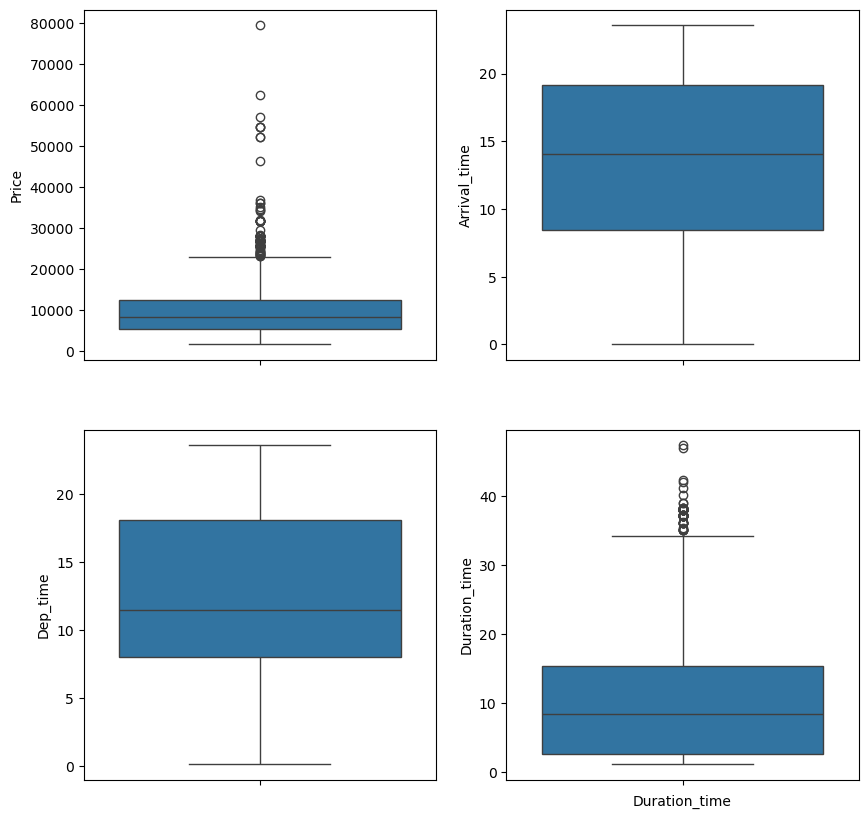

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

columns = [
    ['Price', 'Arrival_time'],
    ['Dep_time', 'Duration_time']
]

for i in range(len(columns)):
    for j in range(len(columns[i])):
        column = columns[i][j]
        sns.boxplot(flight_df[column], ax=ax[i][j])
        plt.xlabel(column)

plt.show()

## Histogram

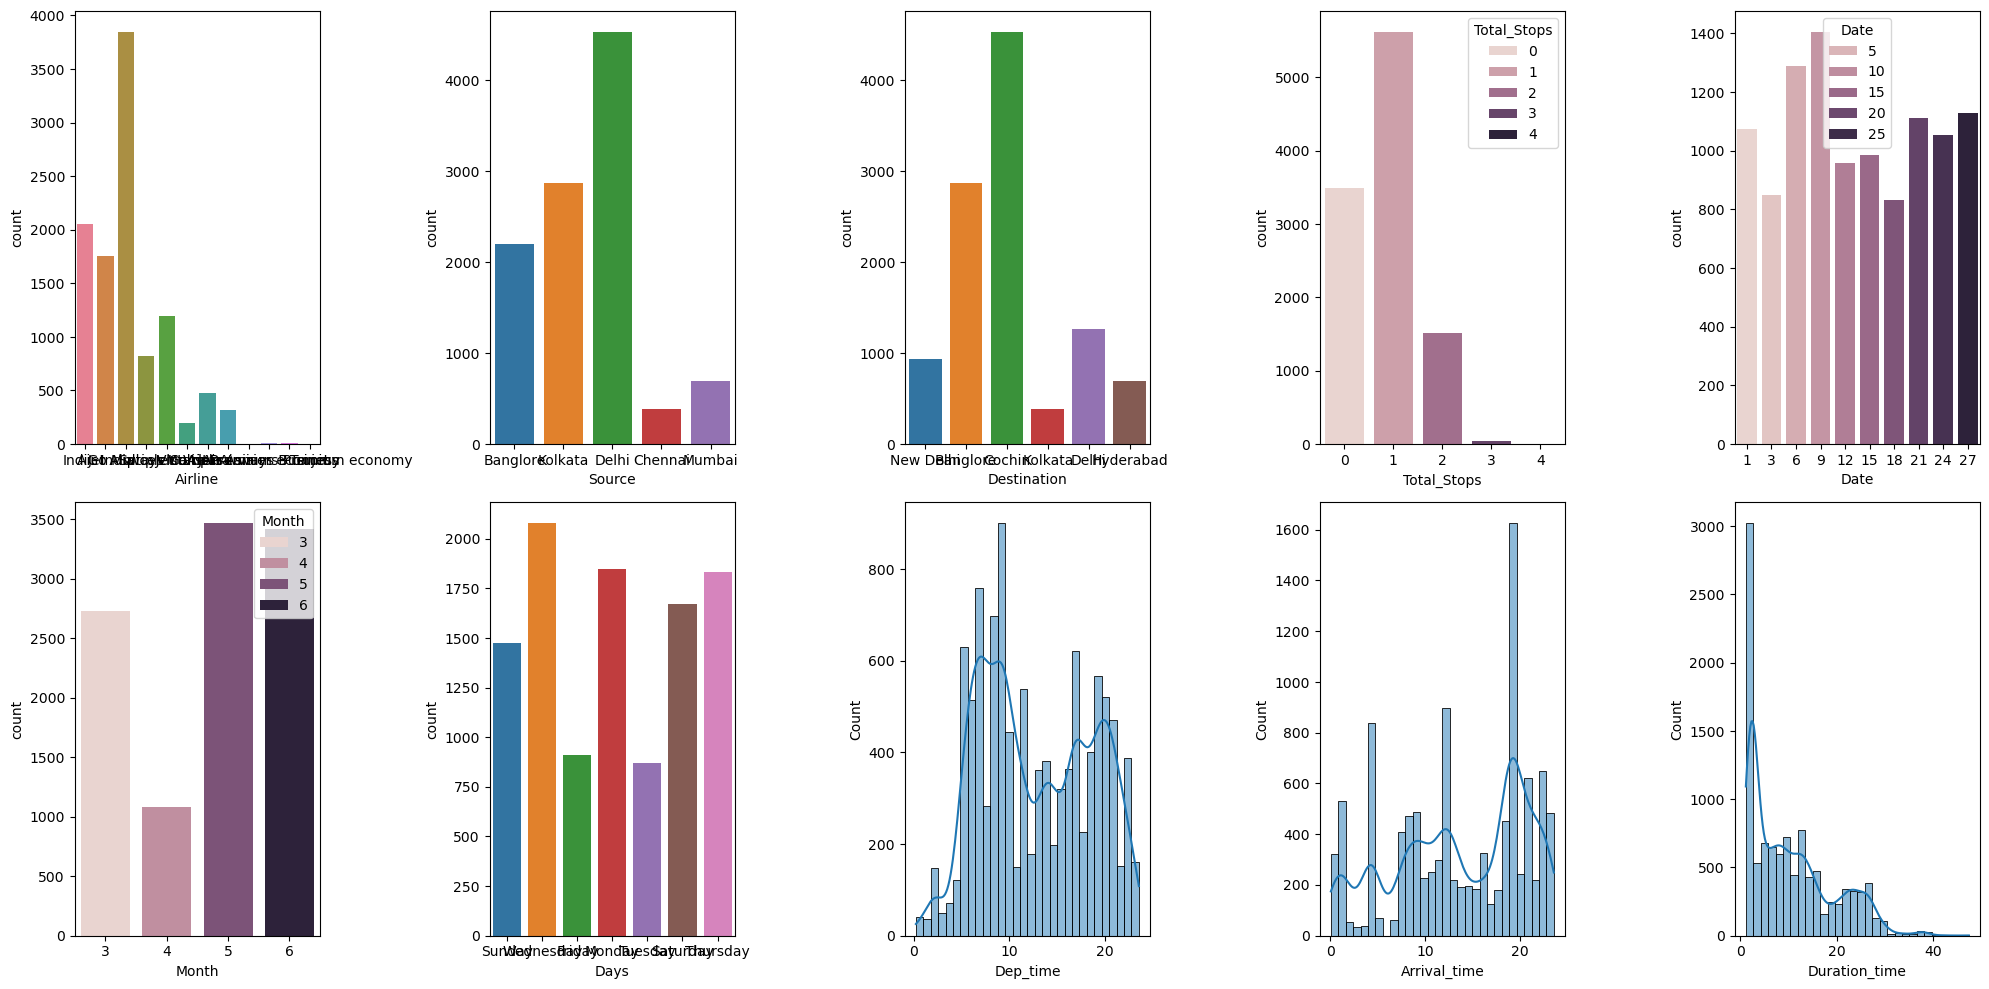

In [10]:
# Airline, Source, Destination, Total_Stops, Date, Month, Arrival_time, Dep_time, Duration_time, Days

fig, ax = plt.subplots(2, 5, figsize=(20, 10))

cate_column = [
    ['Airline', 'Source', 'Destination', 'Total_Stops', 'Date'],
    ['Month', 'Days', 'Dep_time', 'Arrival_time', 'Duration_time']
]

for i in range(len(cate_column)):
    for j in range(len(cate_column[i])):
        column = cate_column[i][j]

        if column in ['Dep_time', 'Arrival_time', 'Duration_time']:
            sns.histplot(x=column, data=flight_df, ax=ax[i, j], bins=30, kde=True)

        else:
            sns.countplot(x=column, data=flight_df, ax=ax[i, j], hue=column)

plt.tight_layout()
plt.show()


<Axes: xlabel='Price', ylabel='Count'>

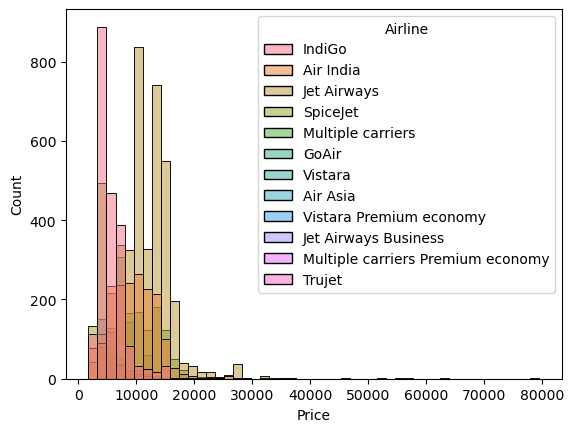

In [11]:
sns.histplot(x='Price', data = flight_df, hue = 'Airline', bins = 50)

## 산점도

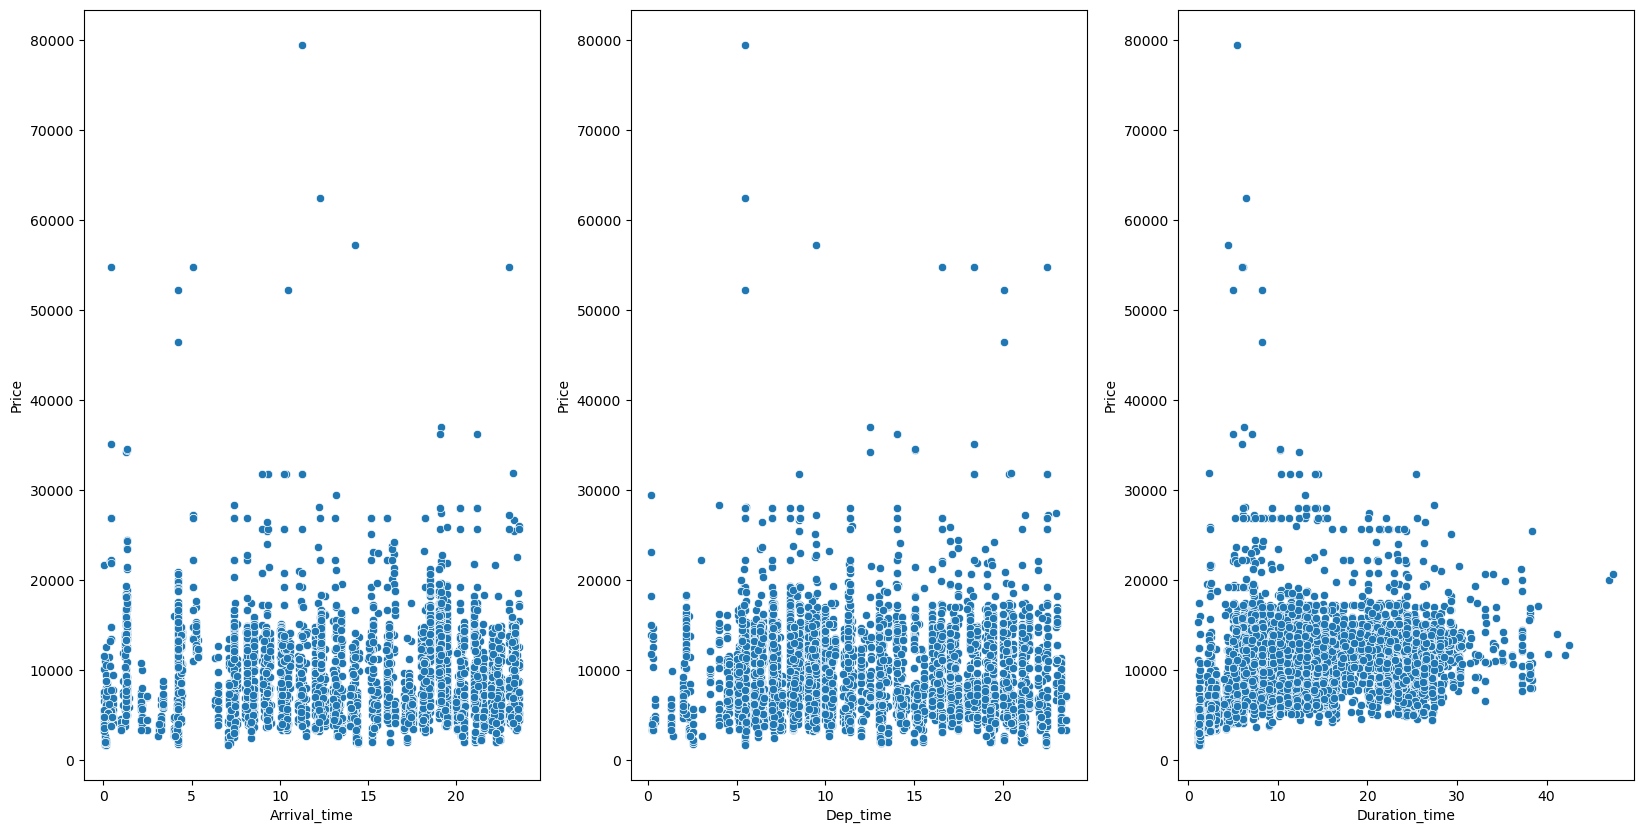

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
cate_column = ['Arrival_time', 'Dep_time', 'Duration_time']

for i in range(len(cate_column)):
    column = cate_column[i]
    sns.scatterplot(x=cate_column[i],y = 'Price' ,data=flight_df, ax=ax[i])



## 상관 행렬
히트맵을 사용하여 변수 간의 상관관계를 표시하고 강한 관계를 식별합니다.

### 전처리

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


def drop_feature(df):
    """
    모델 훈련과 상관없는 속성 제거
    """
    columns = ['Arrival_hours', 'Arrival_min', 'Dep_hours', 'Dep_min', 'Duration_hours', 'Duration_min', 'Year', 'Date', 'Month']
    return df.drop(columns, axis = 1)  # 열기준

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    """
    categories = ['Airline', 'Source', 'Destination', 'Full_Date', 'Days']
    for cate in categories:
        label_encoder = LabelEncoder()
        df[cate] = label_encoder.fit_transform(df[cate])
    return df
        

def preprocess_data(df):
    df = drop_feature(df)
    df = encode_feature(df)
    return df


In [15]:
flight_df = preprocess_data(flight_df)
flight_df

,Airline,Source,Destination,Total_Stops,Price,Arrival_time,Dep_time,Duration_time,Full_Date,Days
0,3,0,5,0,3897,1.10,22.20,2.50,8,3
1,1,3,0,2,7662,13.15,5.50,7.25,20,6
2,4,2,1,2,13882,4.25,9.25,19.00,33,3
3,3,3,0,1,6218,23.30,18.05,5.25,24,3
4,3,0,5,1,13302,21.35,16.50,4.45,0,0
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,22.25,19.55,2.30,13,5
10679,1,3,0,0,4145,23.20,20.45,2.35,19,2
10680,4,0,2,0,7229,11.20,8.20,3.00,19,2
10681,10,0,5,0,12648,14.10,11.30,2.40,0,0


In [16]:
flight_df['Full_Date'].value_counts()

Full_Date
26    504
32    503
27    497
33    495
34    493
23    484
7     423
25    405
2     403
29    382
39    355
38    351
30    342
31    333
35    328
8     323
1     315
3     302
9     299
28    286
22    282
20    277
24    259
10    257
0     199
5     162
6     156
4     142
13    125
11    110
37    109
36    105
12    100
19     94
18     92
21     90
15     89
17     82
16     67
14     63
Name: count, dtype: int64

In [17]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        10683 non-null  int32  
 1   Source         10683 non-null  int32  
 2   Destination    10683 non-null  int32  
 3   Total_Stops    10683 non-null  int64  
 4   Price          10683 non-null  int64  
 5   Arrival_time   10683 non-null  float64
 6   Dep_time       10683 non-null  float64
 7   Duration_time  10683 non-null  float64
 8   Full_Date      10683 non-null  int32  
 9   Days           10683 non-null  int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 626.1 KB


### 상관계수 행렬 생성

In [18]:
corr_matrix = flight_df.corr(numeric_only=True)
corr_matrix

,Airline,Source,Destination,Total_Stops,Price,Arrival_time,Dep_time,Duration_time,Full_Date,Days
Airline,1.000000,-0.013401,0.018479,-0.199411,-0.039520,-0.009234,-0.037165,-0.159292,0.030456,0.004109
Source,-0.013401,1.000000,-0.592574,0.192840,0.015998,0.026228,0.057199,0.163697,0.180692,0.097569
Destination,0.018479,-0.592574,1.000000,-0.295481,-0.071112,-0.039432,-0.068822,-0.257793,-0.367174,-0.115376
Total_Stops,-0.199411,0.192840,-0.295481,1.000000,0.603883,0.035672,-0.061591,0.738996,0.051058,0.108114
Price,-0.039520,0.015998,-0.071112,0.603883,1.000000,0.022267,0.006021,0.507484,-0.138931,0.014930
Arrival_time,-0.009234,0.026228,-0.039432,0.035672,0.022267,1.000000,0.008272,0.051423,-0.007191,0.005138
Dep_time,-0.037165,0.057199,-0.068822,-0.061591,0.006021,0.008272,1.000000,0.001694,0.036784,-0.013017
Duration_time,-0.159292,0.163697,-0.257793,0.738996,0.507484,0.051423,0.001694,1.000000,0.009541,0.088280
Full_Date,0.030456,0.180692,-0.367174,0.051058,-0.138931,-0.007191,0.036784,0.009541,1.000000,-0.055361
Days,0.004109,0.097569,-0.115376,0.108114,0.014930,0.005138,-0.013017,0.088280,-0.055361,1.000000


<Axes: >

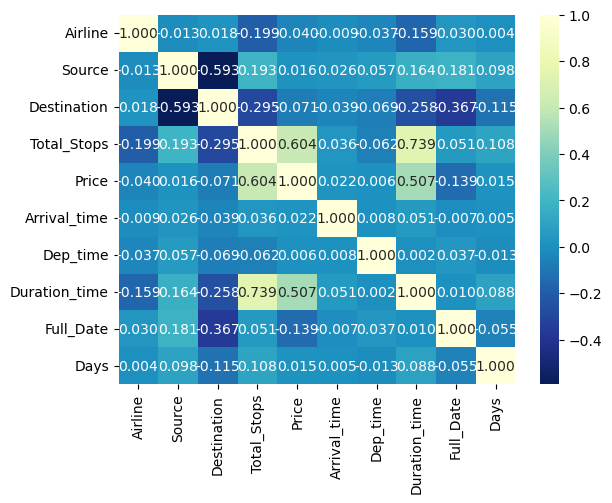

In [19]:
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='YlGnBu_r')

### 상관계수 R 해석
![](https://blog.kakaocdn.net/dn/cjy6l3/btqFMHmqPmH/FzOy23oqydqxWAkpbt1zgK/img.png)



**1. [Duration_time - Total_Stops] : 0.738996 -> 높은 상관관계**

**2. [Total_Stops - Price] : 0.603883 -> 다소 높은 상관관계**

**3. [Duration_time - Price] : 0.507484 -> 다소 높은 상관관계**

**4. [Destination - Source] : -0.592574 -> 다소 높은 상관관계**



## 산점도 + 회귀선

In [20]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        10683 non-null  int32  
 1   Source         10683 non-null  int32  
 2   Destination    10683 non-null  int32  
 3   Total_Stops    10683 non-null  int64  
 4   Price          10683 non-null  int64  
 5   Arrival_time   10683 non-null  float64
 6   Dep_time       10683 non-null  float64
 7   Duration_time  10683 non-null  float64
 8   Full_Date      10683 non-null  int32  
 9   Days           10683 non-null  int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 626.1 KB


In [21]:
from sklearn.preprocessing import LabelEncoder

def drop_feature(df):
    """
    모델 훈련과 상관없는 속성 제거
    """
    columns = ['Full_Date']
    return df.drop(columns, axis = 1)  # 열기준

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    """
    categories = ['Airline', 'Source', 'Destination','Days']
    for cate in categories:
        label_encoder = LabelEncoder()
        df[cate] = label_encoder.fit_transform(df[cate])
    return df
        

def preprocess_data(df):
    df = drop_feature(df)
    df = encode_feature(df)
    return df

preprocess_data(flight_df)

,Airline,Source,Destination,Total_Stops,Price,Arrival_time,Dep_time,Duration_time,Days
0,3,0,5,0,3897,1.10,22.20,2.50,3
1,1,3,0,2,7662,13.15,5.50,7.25,6
2,4,2,1,2,13882,4.25,9.25,19.00,3
3,3,3,0,1,6218,23.30,18.05,5.25,3
4,3,0,5,1,13302,21.35,16.50,4.45,0
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,22.25,19.55,2.30,5
10679,1,3,0,0,4145,23.20,20.45,2.35,2
10680,4,0,2,0,7229,11.20,8.20,3.00,2
10681,10,0,5,0,12648,14.10,11.30,2.40,0


In [23]:
flight_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Arrival_time', 'Dep_time', 'Duration_time', 'Full_Date', 'Days'],
      dtype='object')

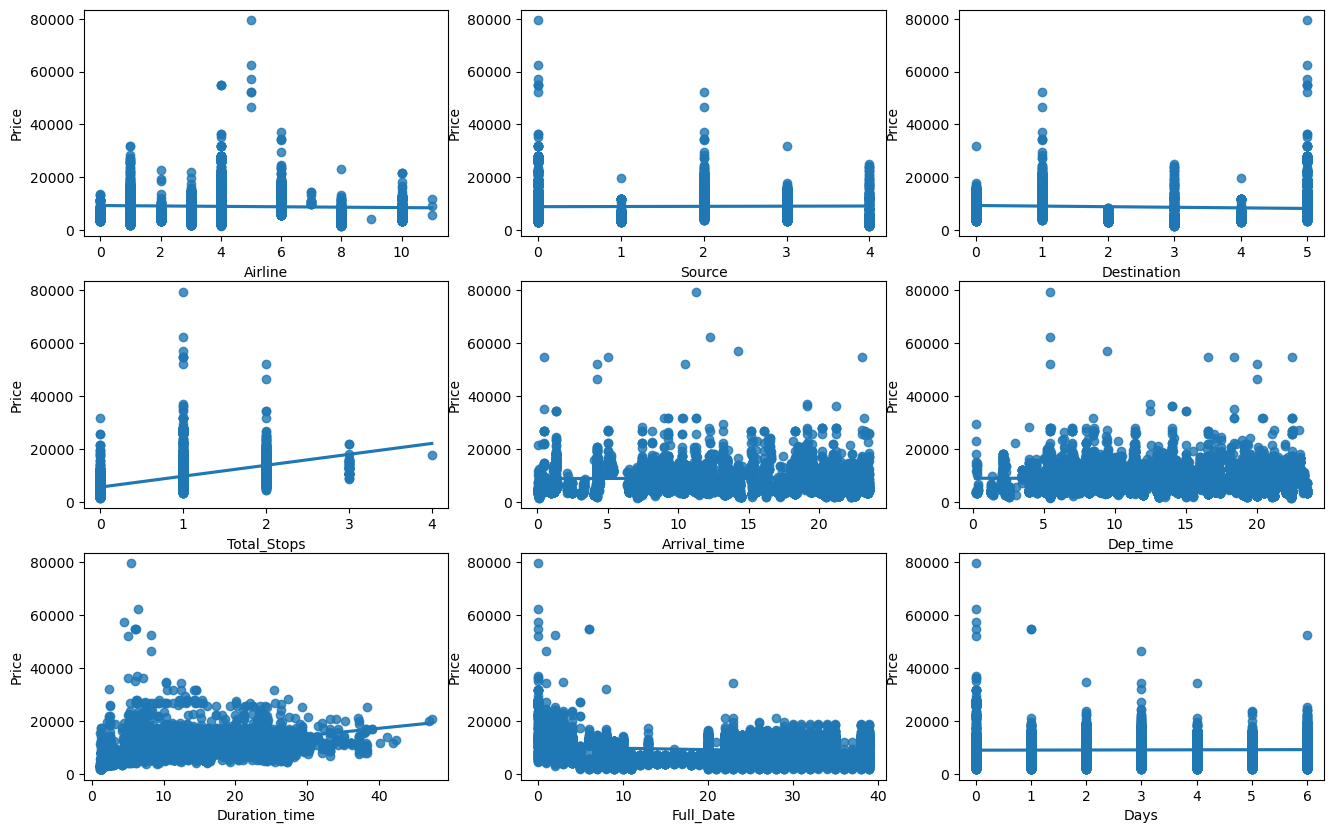

In [24]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=3, nrows=3)

columns = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Arrival_time', 'Dep_time', 'Duration_time', 'Full_Date', 'Days']

for i, col_name in enumerate(columns):
    #            i 0 1 2 3 4 5 6 7 8 
    row = i // 3 # 0 0 0 1 1 1 2 2 2 
    col = i % 3  # 0 1 2 0 1 2 0 1 2 
    ax_ = ax[row][col] 
    
    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_)
    # scatter + line plot(회귀선)
    sns.regplot(data=flight_df, x=col_name, y='Price', ax=ax_)

## 학습/테스트 분리

In [25]:
# 데이터 준비
from sklearn.model_selection import train_test_split

X = flight_df.drop('Price', axis = 1)
y = flight_df['Price']
print(X.shape, y.shape)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


(10683, 9) (10683,)


((8012, 9), (2671, 9), (8012,), (2671,))

## 스케일링

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.01502984,  0.89499328, -0.97120332, ...,  0.21241285,
         0.36699547, -0.59044382],
       [-0.83598846,  0.04709377, -0.29633073, ..., -0.17758672,
         0.7882878 , -1.10186391],
       [ 0.01502984,  0.89499328, -0.97120332, ..., -0.59713172,
        -0.13855533,  1.45523655],
       ...,
       [-0.41047931, -1.64870526,  0.37854187, ..., -0.94576771,
         1.29383859, -1.613284  ],
       [ 0.86604815,  0.04709377, -0.29633073, ..., -0.36076834,
         1.46235552,  0.43239637],
       [-1.26149762,  0.04709377, -0.29633073, ...,  1.6424113 ,
        -1.65520771,  1.45523655]])

## 교차검증

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  # 예시로 회귀 모델 사용

# 회귀 모델 생성 (원하는 모델로 바꿔도 돼요)
lr = LinearRegression()
cv = 5

# 교차 검증 수행 (MSE로 평가)
scores_mse = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
print("각 회차 MSE 점수:", -scores_mse)

# 교차 검증 수행 (MAE로 평가)
scores_mae = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='neg_mean_absolute_error')
print("각 회차 MAE 점수:", -scores_mae)

# 교차 검증 수행 (R²로 평가)
scores_r2 = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='r2')
print("각 회차 R² 점수:", scores_r2)

print(f'''
[최종점수]
MSE 점수 : {np.mean(-scores_mse)}
MAE 점수 : {np.mean(-scores_mae)}
RMSE 점수 : {np.sqrt(np.mean(-scores_mse))}
R² 점수 : {np.mean(scores_r2)}
''')

각 회차 MSE 점수: [10089778.49898804 13429872.71551043 15073873.7906684  13978757.6239276
 10139812.18207381]
각 회차 MAE 점수: [2445.69861824 2528.30253664 2529.27200151 2532.25661711 2368.99494129]
각 회차 R² 점수: [0.46994938 0.38480918 0.40171576 0.39419779 0.45144286]

[최종점수]
MSE 점수 : 12542418.962233657
MAE 점수 : 2480.9049429584456
RMSE 점수 : 3541.527772336913
R² 점수 : 0.4204229945376611



## Poly

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('lr', LinearRegression())
])

# 훈련
model.fit(X_train_scaled, y_train) # 다항변환후 학습
print(model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

y_pred = model.predict(X_test_scaled)

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'''
[최종점수]
MSE 점수 : {mse},
MAE 점수 : {mae},
RMSE 점수 : {rmse},
R² 점수 : {r2}
''')

evaluate_regression(y_test, y_pred)

0.6845941350012582 0.6482446407419411

[최종점수]
MSE 점수 : 7185438.611252029,
MAE 점수 : 1881.0038455576096,
RMSE 점수 : 2680.566845137802,
R² 점수 : 0.6482446407419411



In [69]:
# pipeline내 모델의 회귀계수/절편 
lr = model.named_steps['lr']
print(lr.coef_, lr.intercept_)

# 선형회귀식의 계산 - y = w1x1 + w2x2 + ... + b
coef = lr.coef_
intercept = lr.intercept_

poly = model.named_steps['poly']

# 예측값 확인 : 선형회귀식의 계산은 행렬곱을 통해 처리된다.
X_sample = poly.transform(X_test_scaled)[0] 
print(X_sample.shape, coef.shape)
y_sample = np.dot(X_sample, coef) + intercept
y_sample, model.predict(X_test_scaled)[0] # price 예측값

[ 9.35234709e+03  2.68378629e+15 -2.03173810e+14 -1.21952568e+14
  5.69552921e+03 -3.44966554e+03 -3.14495587e+05 -6.58108458e+03
 -2.22495829e+03 -7.70500000e+02  1.56083522e+04  2.07646719e+04
  2.53156250e+02 -6.36898438e+02  4.32492188e+02  3.46906250e+02
 -1.22180664e+02 -8.36772461e+01 -7.91630466e+13 -1.31459384e+15
 -2.01082406e+15  7.19243359e+03 -9.01331055e+03 -7.26163930e+05
 -2.13417734e+04 -5.95202734e+03 -2.03046832e+15 -1.12164908e+15
  9.26996875e+03 -1.13349277e+04 -9.69199562e+05 -2.77381094e+04
 -7.91668359e+03  6.59968750e+02 -7.46507812e+02  6.00312500e+02
  5.48593750e+01 -8.06104736e+02 -1.54527832e+02 -2.99806250e+03
  3.45440625e+03  4.63879297e+03  8.79863281e+01  7.65166016e+01
 -1.17959375e+03 -3.72933594e+03  3.45976562e+01 -1.01542969e+01
 -5.23350000e+03  8.43574219e+01 -3.85234375e+01  5.08767578e+02
  1.02145508e+02  1.33758545e+02 -5.07500000e+01 -1.69343750e+02
 -2.53265625e+02 -5.87812500e+02  5.37812500e+01  6.03046875e+01
 -4.37500000e+01 -8.98535

(12626.845703125, 12626.845703125)